## 제7강. 파이썬으로 비디오 추출 이미지 분석하기

이 강의에서는 지난 '7강. 비디오 추출'에서 동영상을 프레임별로 .jpg파일로 변환한 225개의 이미지 파일을 대상으로 이미지 분석(image analysis)을 실행해 보도록 하겠습니다!!

한화CF 동영상 (hanhwa.mp4)을 프레임 별로 추출하여, 225개의 .jpg파일로 추출하였고, 
이를 AZURE IMAGE ANALYSIS를 이용하여 객체/요소 분석을 하는 것입니다!!



그럼, 먼저 실습에 필요한 요소들을 pip 명령어를 사용하여 콘솔에 설치해 봅시다!! :)

In [1]:
#azure-cognitiveservice-vision-computervion을 설치합니다!!
!pip install azure-cognitiveservices-vision-computervision
#pillow 라이브러리를 설치합니다!!
!pip install pillow

필요한 라이브러리를 불러와 볼까요? ^ ^

In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

Azure key와 endpoint를 입력해 줍니다!!

In [3]:
subscription_key = "9b134e7a38aa401a99ac6b7552156e13"
endpoint = "https://gist-aix-01.cognitiveservices.azure.com/"

computervision client를 선언해 줍니다!!

In [4]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))


이미지 url을 변수 remote_image_url에 저장해 줍니다!!

In [12]:
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"


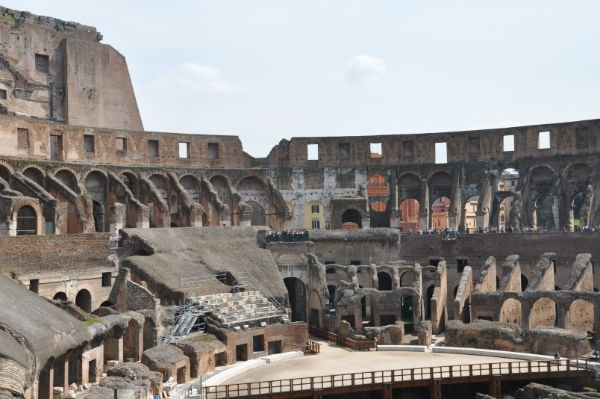

In [15]:
from IPython import display
display.Image(remote_image_url)

Object Location = 물체를 감지하고, 네모 박스를 그려 해당 물체를 검출합니다!!

결과로서, 네모 박스의 pixel (218, 402, 179, 384)을 리턴합니다!!

In [20]:
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)
# 물체(객체) 감지 - OBJECT DETECTION
# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object at location {}, {}, {}, {}".format( \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Objects - remote =====
Detecting objects in remote image:
object at location 213, 365, 85, 208
object at location 218, 402, 179, 384
object at location 238, 417, 298, 416
object at location 116, 419, 60, 386


다른 이미지를 사용해 볼까요?

한화의 126번째 프레임을 사용해 봅시다!!

In [25]:
# 해당 이미지를 인터넷에 업로드하고, 이 url을 아래 적어 줍니다!!
# 아래 이미지는 한화 CF의 126번째 프레임입니다!!
img001 = "https://raw.githubusercontent.com/dscoool/gist-aix/main/image/img126.jpg"
# https://raw.githubusercontent.com/dscoool/gist-aix/main/image/img126.jpg
# https://raw.githubusercontent.com/dscoool/gist-aix/main/image/img126.jpg


이미지 분석을 시행합니다!!

먼저, 이미지에 어떤 '객체(요소)'가 들어가 있는지 분석해 볼까요? ^ ^

In [27]:
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(img001)

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'house' with confidence 94.21%
'painting' with confidence 93.07%
'tree' with confidence 92.52%
'plant' with confidence 89.96%
'sky' with confidence 85.98%
'cloud' with confidence 85.21%
'screenshot' with confidence 84.74%
'building' with confidence 83.02%
'outdoor' with confidence 58.65%


===================================================================================

아래 객체(요소) 결과 분석 예시입니다!!

===== Tag an image - remote =====

Tags in the remote image: 

'house' with confidence 94.21%

'painting' with confidence 93.07%

'tree' with confidence 92.52%

'plant' with confidence 89.96%

'sky' with confidence 85.98%

'cloud' with confidence 85.21%

'screenshot' with confidence 84.74%

'building' with confidence 83.02%

'outdoor' with confidence 58.65%

세 번째 이미지를 분석해 봅시다!!

ex) 이번에는 img207 (207번째 프레임)을 분석해 보도록 하겠습니다!!

In [41]:
img04='https://raw.githubusercontent.com/dscoool/gist-aix/main/image/img207.jpg'


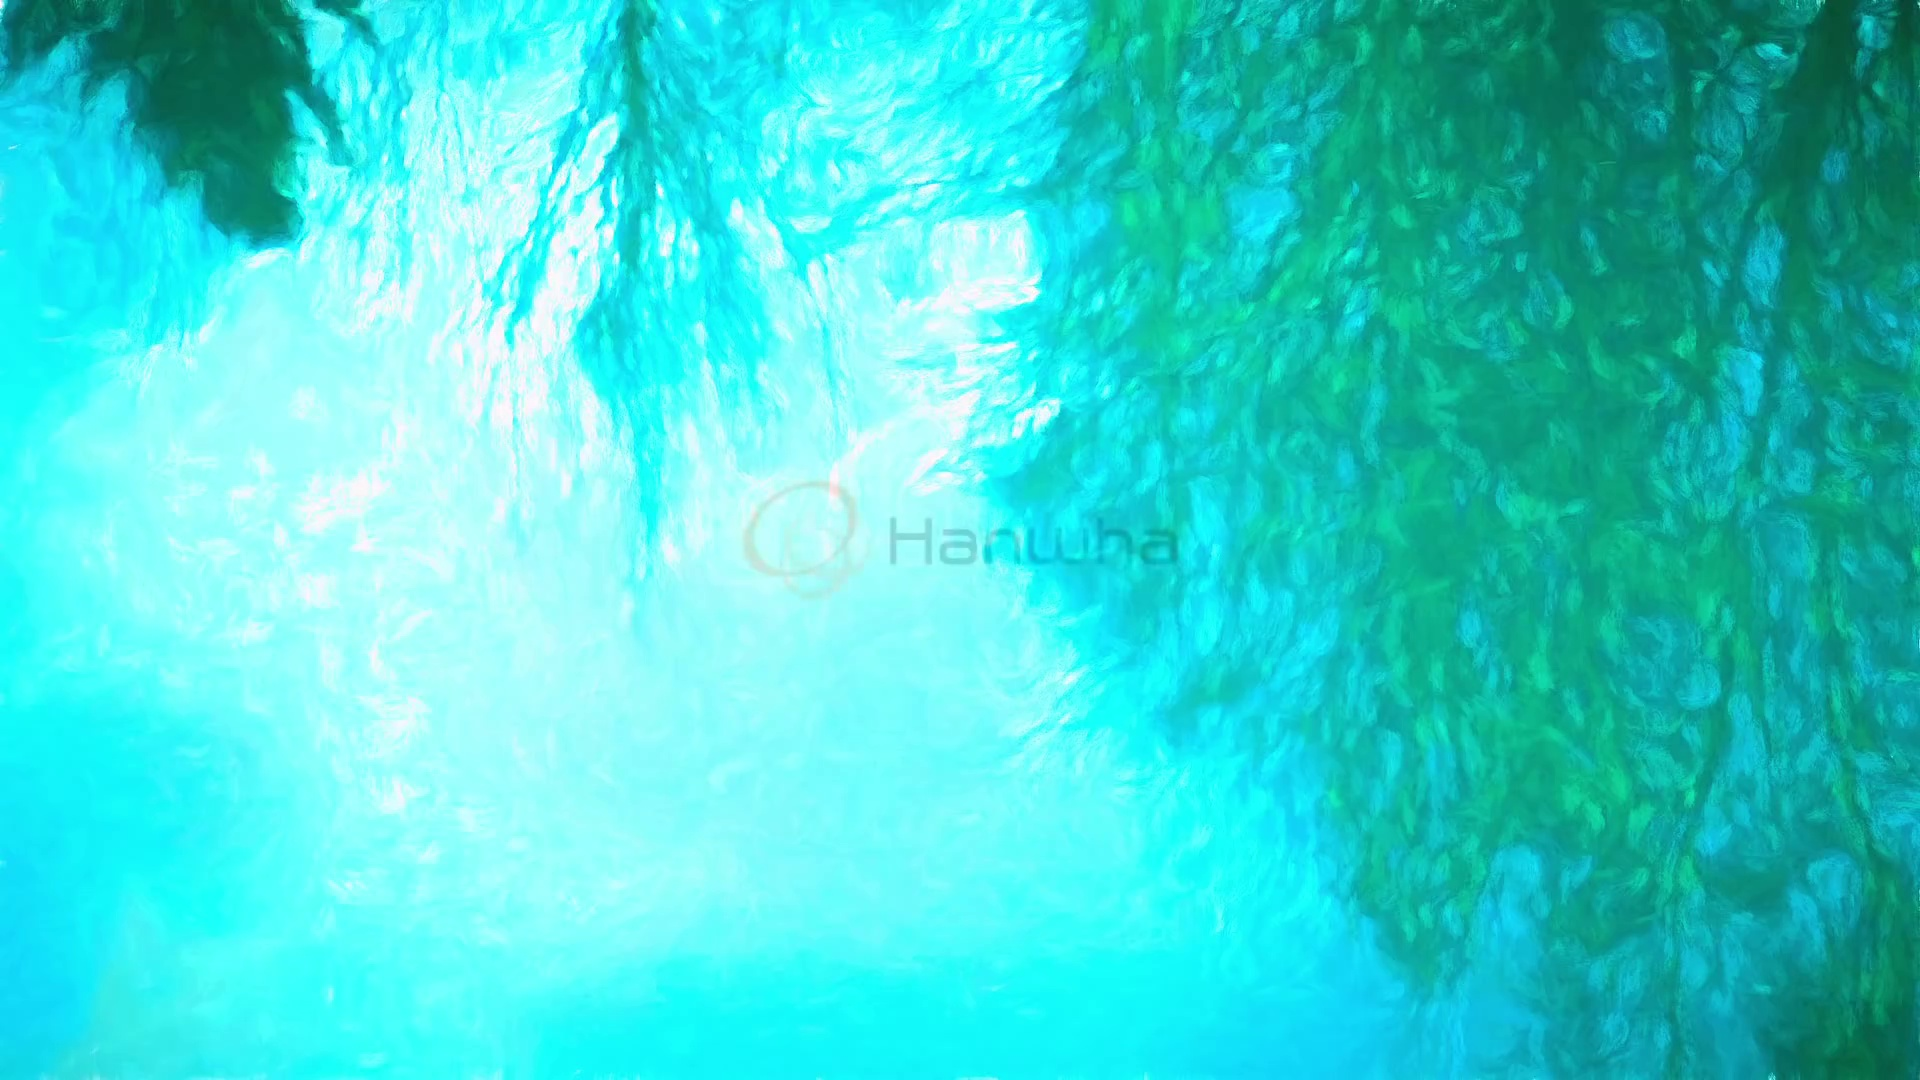

In [42]:
from IPython import display
#이미지를 출력하고 싶으면 아래와 같이 하면 됩니당!!
display.Image(img04)

## 이미지 설명

이미지 설명 기능을 호출해 봅시다!!

아래와 같이 작성하여, 해당 이미지를 인공지능이 읽고

'TEXT'로 분석한 결과를 가져와 봅니다!!


In [43]:
print("===== Describe an image - remote =====")
description_results = computervision_client.describe_image(img04) #img04 이미지 url을 지정해 줍니다!!

# 이미지 분석 결과(설명) 및 정확도를 리턴받습니다!!

print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}'정확도 {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a body of water with trees in the background' with confidence 39.02%


===============================================


아래는 예제로서, 인공지능이 그림을 인식하고 설명한 

결과를 출력한 것입니다!!

===== Describe an image - remote =====


Description of remote image: 


'a body of water with trees in the background' with confidence 39.02% </br>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## 브랜드 인식

In [45]:
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
img10 = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(img10, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Microsoft' brand detected with confidence 62.5% at location 58, 113, 106, 152
'Microsoft' brand detected with confidence 69.8% at location 58, 260, 86, 149


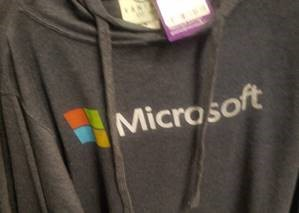

In [15]:
display.Image(img10)